# Getting Started with VS Code for Scientific Computing (Completed)

:::{admonition} Learning Objectives
:class: note
- Set up VS Code for Python scientific computing
- Use Jupyter notebooks in VS Code
- Perform numerical differentiation using finite difference methods
- Compare numerical results with analytical solutions
:::

## First, Install VS Code

If you don't have VS Code installed yet, this section will guide you through the process. It only takes a few minutes!

### Step 1: Download

Go to the **official VS Code website**:

👉 **[https://code.visualstudio.com/download](https://code.visualstudio.com/download)**

Choose the installer for your operating system:

- **macOS**: Click the macOS link (Universal for both Intel and Apple Silicon chips)
- **Windows**: Click "Windows" and download the User Installer
- **Linux**: Choose the installer for your distribution (.deb, .rpm, or .tar.gz)

The download is small (~200 MB) and will only take a minute or two.

### Step 2: Install

Once downloaded:

**On macOS:**
1. Open the downloaded `.zip` file (it should auto-extract)
2. Drag `Visual Studio Code.app` to your **Applications** folder
3. Open **Applications** and double-click **Visual Studio Code** to launch it

**On Windows:**
1. Double-click the `.exe` installer file
2. Follow the installation wizard (you can use default settings)
3. VS Code will launch automatically after installation

**On Linux:**
1. Follow the platform-specific instructions at [https://code.visualstudio.com/docs/setup/linux](https://code.visualstudio.com/docs/setup/linux)

### Step 3: Install Required Extensions

Once VS Code is open, you'll need two extensions to work with Jupyter notebooks and Python:

1. **Jupyter Extension**:
   - Click the **Extensions** icon on the left sidebar (looks like 4 squares)
      - Alternatively, you can open the Extensions panel by pressing `Ctrl+Shift+X` (Windows/Linux) or `Cmd+Shift+X` (macOS)
   - Search for `"Jupyter"`
   - Install **"Jupyter"** by Microsoft (the top result)

2. **Python Extension**:
   - In the same Extensions panel, search for `"Python"`
   - Install **"Python"** by Microsoft (the top result)

VS Code will prompt you to reload after installing—click **Reload**.

### Step 4: Verify Python is Installed

To check if Python is available on your system:

- Open VS Code's **Terminal** (View → Terminal, or Ctrl+`)
- Type: `python --version` or `python3 --version`
- You should see something like `Python 3.10.0` (version number may vary)

If this doesn't work, you may need to [install Python](https://www.python.org/downloads/). We recommend **Python 3.10 or newer**.

---

## Libraries Needed for This Course

We will work with several Python libraries throughout this course. Make sure you have the following installed:
- `numpy`: For numerical computations
- `matplotlib`: For plotting and visualization
- `scipy`: For scientific computing functions
- `pandas`: For data manipulation and analysis

Here we import the necessary libraries for our activities.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')


## Numerical Derivatives from Position Data

### The Physics: A Ball Tossed with Air Resistance

Imagine you toss a ball at an angle. As we will learn, its motion can be modeled by:

$$\mathbf{F}_{\text{net}} = -m\mathbf{g} - C_D |\mathbf{v}|\mathbf{v}$$

where the second term is quadratic air resistance. This gives us the force and thus the accelerations in both $x$ and $y$ directions. We can use this to compute the velocity and position of the ball through [numerical integration]. Here, we only use this to generate synthetic data for our activity.


This is because in most experiments, we measure *positions* at different times. To get velocities or accelerations, we typically have to numerically differentiate our data. It is this generic process that is used widely in experimental physics or observational astronomy. Of course, there are a variety of methods to perform [numerical differentiation](https://en.wikipedia.org/wiki/Numerical_differentiation) that can yield different accuracies. For this activity, we will use a simple method called **[finite differences](https://en.wikipedia.org/wiki/Finite_difference)**. in particular, we are going to use the **forward difference** method where we approximate derivatives using differences between successive data points.

### Finite Differences: Computing Derivatives from Data

If we have position data at times $t_i$, we can approximate the velocity using:

$$v_i \approx \frac{x_{i+1} - x_i}{\Delta t}$$

and then the acceleration as:

$$a_i \approx \frac{v_{i+1} - v_i}{\Delta t}$$

This is called the **forward difference** method. This is because it uses the next data point to compute the derivative at the current point. 

:::{admonition} Basic Finite Difference Formulae
:class: tip

There are three common finite difference methods to approximate derivatives from discrete data:

- **Forward Difference**:

  $$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{\Delta x}$$

- **Backward Difference**:

    $$f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{\Delta x}$$

- **Central Difference**:

    $$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2\Delta x}$$

Here, the forward difference uses the next point, the backward difference uses the previous point, and the central difference uses both neighboring points for a more accurate estimate. 
:::


### Making Synthetic Data

Below, we generate synthetic position data for a ball tossed at 45 degrees with air resistance. This simulates the "true" motion of the ball, which we will then use to practice numerical differentiation. Note, that we use [Euler integration](https://en.wikipedia.org/wiki/Euler_method) to generate the trajectory (we will learn more about this next week!).

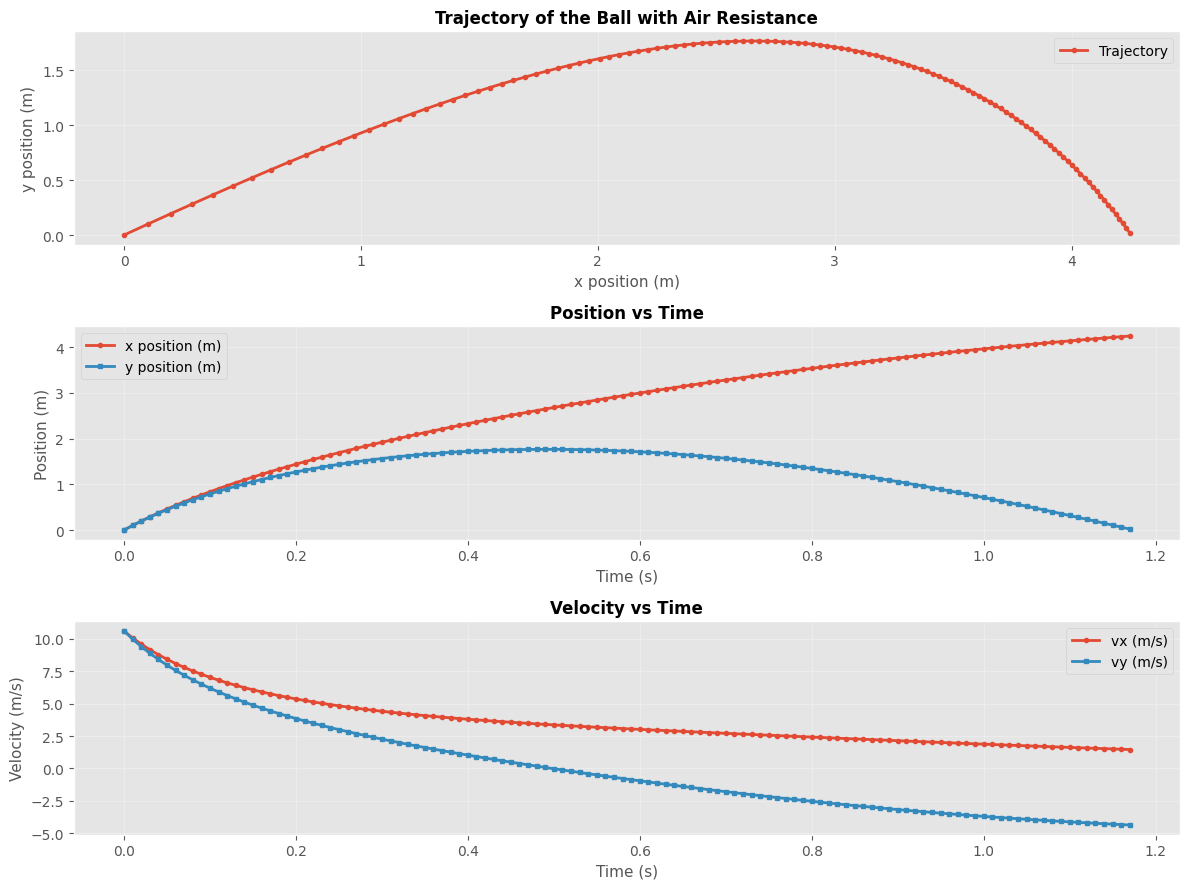

In [12]:
# Generate synthetic data: a ball tossed with air resistance
# This simulates the "true" motion of the ball

# Parameters
g = 9.81          # m/s^2
C_D = 0.05        # drag coefficient (in units that give proper scaling)
m = 0.15          # mass in kg (baseball)
dt_true = 0.01    # time step for generating "true" data

# Initial conditions (toss at 45 degrees, 15 m/s)
v0_mag = 15.0     # initial speed
angle = 45 * np.pi / 180  # 45 degrees
v0_x = v0_mag * np.cos(angle)
v0_y = v0_mag * np.sin(angle)
x0, y0 = 0.0, 0.0  # starting at origin

# Simulate using Euler integration (we'll learn more about this in Part 2!)
t_sim = []
x_data = []
y_data = []
vx_true = []
vy_true = []

x, y = x0, y0
vx, vy = v0_x, v0_y
t = 0.0
t_end = 3.0  # simulate for 3 seconds

while t <= t_end and y >= 0:  # stop when ball hits ground
    t_sim.append(t)
    x_data.append(x)
    y_data.append(y)
    vx_true.append(vx)
    vy_true.append(vy)
    
    # Compute drag force
    v_mag = np.sqrt(vx**2 + vy**2)
    f_drag_x = -C_D * v_mag * vx
    f_drag_y = -C_D * v_mag * vy - m * g
    
    # Update velocities and positions using Euler method
    vx += (f_drag_x / m) * dt_true
    vy += (f_drag_y / m) * dt_true
    x += vx * dt_true
    y += vy * dt_true
    t += dt_true

# Convert to numpy arrays
t_sim = np.array(t_sim)
x_data = np.array(x_data)
y_data = np.array(y_data)
vx_true = np.array(vx_true)
vy_true = np.array(vy_true)

# Plot the synthetic data
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(x_data, y_data, 'o-', linewidth=2, markersize=3, label='Trajectory')
plt.title('Trajectory of the Ball with Air Resistance', fontsize=12, fontweight='bold')
plt.xlabel('x position (m)', fontsize=11)
plt.ylabel('y position (m)', fontsize=11)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.subplot(3, 1, 2)
plt.plot(t_sim, x_data, 'o-', linewidth=2, markersize=3, label='x position (m)')
plt.plot(t_sim, y_data, 's-', linewidth=2, markersize=3, label='y position (m)')
plt.title('Position vs Time', fontsize=12, fontweight='bold')
plt.xlabel('Time (s)', fontsize=11)
plt.ylabel('Position (m)', fontsize=11)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.subplot(3, 1, 3)
plt.plot(t_sim, vx_true, 'o-', linewidth=2, markersize=3, label='vx (m/s)')
plt.plot(t_sim, vy_true, 's-', linewidth=2, markersize=3, label='vy (m/s)')
plt.title('Velocity vs Time', fontsize=12, fontweight='bold')
plt.xlabel('Time (s)', fontsize=11)
plt.ylabel('Velocity (m/s)', fontsize=11)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

## Your Turn: Analyze the Trajectory

We have generated synthetic position data for a ball tossed at 45 degrees with air resistance. Your task is to analyze this data by plotting the position and numerically-derived accelerations. For the purposes of this activity, you can assume the time and position arrays are collected data. To perform this analysis, you may only use finite difference methods to compute the derivatives.

### Arrays Provided

- `t`: Time array (in seconds)
- `x`: x-position array (in meters)
- `y`: y-position array (in meters)

In [8]:
# Arrays to use for the activity
t = t_sim
x = x_data
y = y_data

### Task

* Compute and plot the numerically-derived velocities and accelerations. What do you notice?
* Plot the numerically-derived velocities and accelerations against the simulated "true" values. How well do they match

In [9]:

# ============================================================================
# Your Turn: Analyze the Trajectory (Solution)
# ============================================================================

# Compute numerical derivatives using forward difference method
dt = t[1] - t[0]  # time step

# Compute velocities from position data
vx_numerical = np.zeros(len(t) - 1)
vy_numerical = np.zeros(len(t) - 1)

for i in range(len(t) - 1):
    vx_numerical[i] = (x[i+1] - x[i]) / dt
    vy_numerical[i] = (y[i+1] - y[i]) / dt

# Compute accelerations from velocity data
ax_numerical = np.zeros(len(vx_numerical) - 1)
ay_numerical = np.zeros(len(vy_numerical) - 1)

for i in range(len(vx_numerical) - 1):
    ax_numerical[i] = (vx_numerical[i+1] - vx_numerical[i]) / dt
    ay_numerical[i] = (vy_numerical[i+1] - vy_numerical[i]) / dt

# Adjust time arrays (derivatives reduce array size by 1)
t_vel = t[:-1]
t_acc = t[:-2]

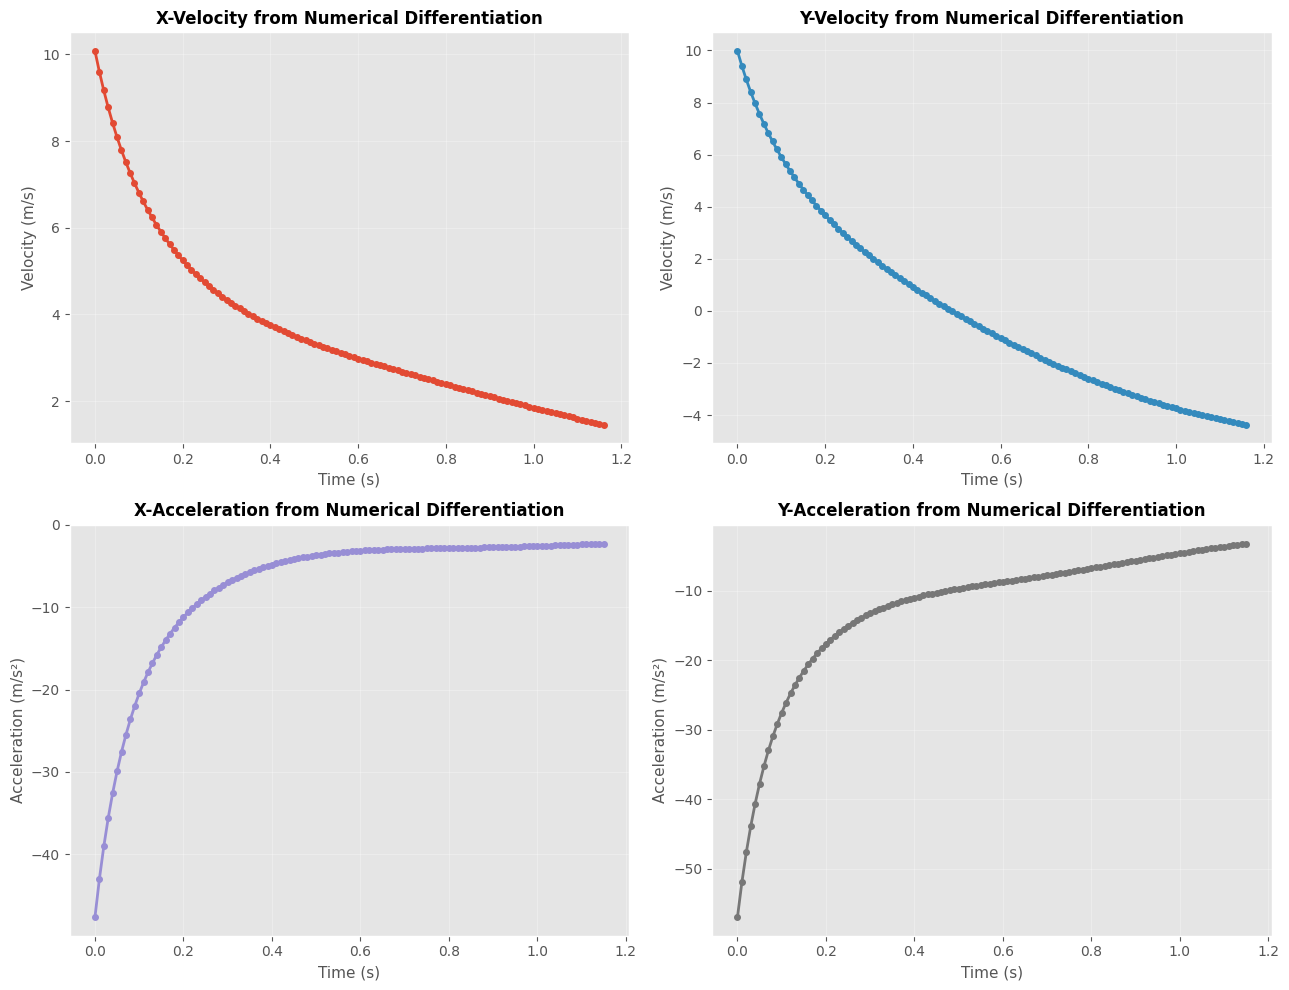

In [10]:
# === PLOT 1: Numerically-derived velocities and accelerations ===
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

axes[0, 0].plot(t_vel, vx_numerical, 'o-', linewidth=2, markersize=4)
axes[0, 0].set_xlabel('Time (s)', fontsize=11)
axes[0, 0].set_ylabel('Velocity (m/s)', fontsize=11)
axes[0, 0].set_title('X-Velocity from Numerical Differentiation', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(t_vel, vy_numerical, 'o-', linewidth=2, markersize=4, color='C1')
axes[0, 1].set_xlabel('Time (s)', fontsize=11)
axes[0, 1].set_ylabel('Velocity (m/s)', fontsize=11)
axes[0, 1].set_title('Y-Velocity from Numerical Differentiation', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(t_acc, ax_numerical, 'o-', linewidth=2, markersize=4, color='C2')
axes[1, 0].set_xlabel('Time (s)', fontsize=11)
axes[1, 0].set_ylabel('Acceleration (m/s²)', fontsize=11)
axes[1, 0].set_title('X-Acceleration from Numerical Differentiation', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(t_acc, ay_numerical, 'o-', linewidth=2, markersize=4, color='C3')
axes[1, 1].set_xlabel('Time (s)', fontsize=11)
axes[1, 1].set_ylabel('Acceleration (m/s²)', fontsize=11)
axes[1, 1].set_title('Y-Acceleration from Numerical Differentiation', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

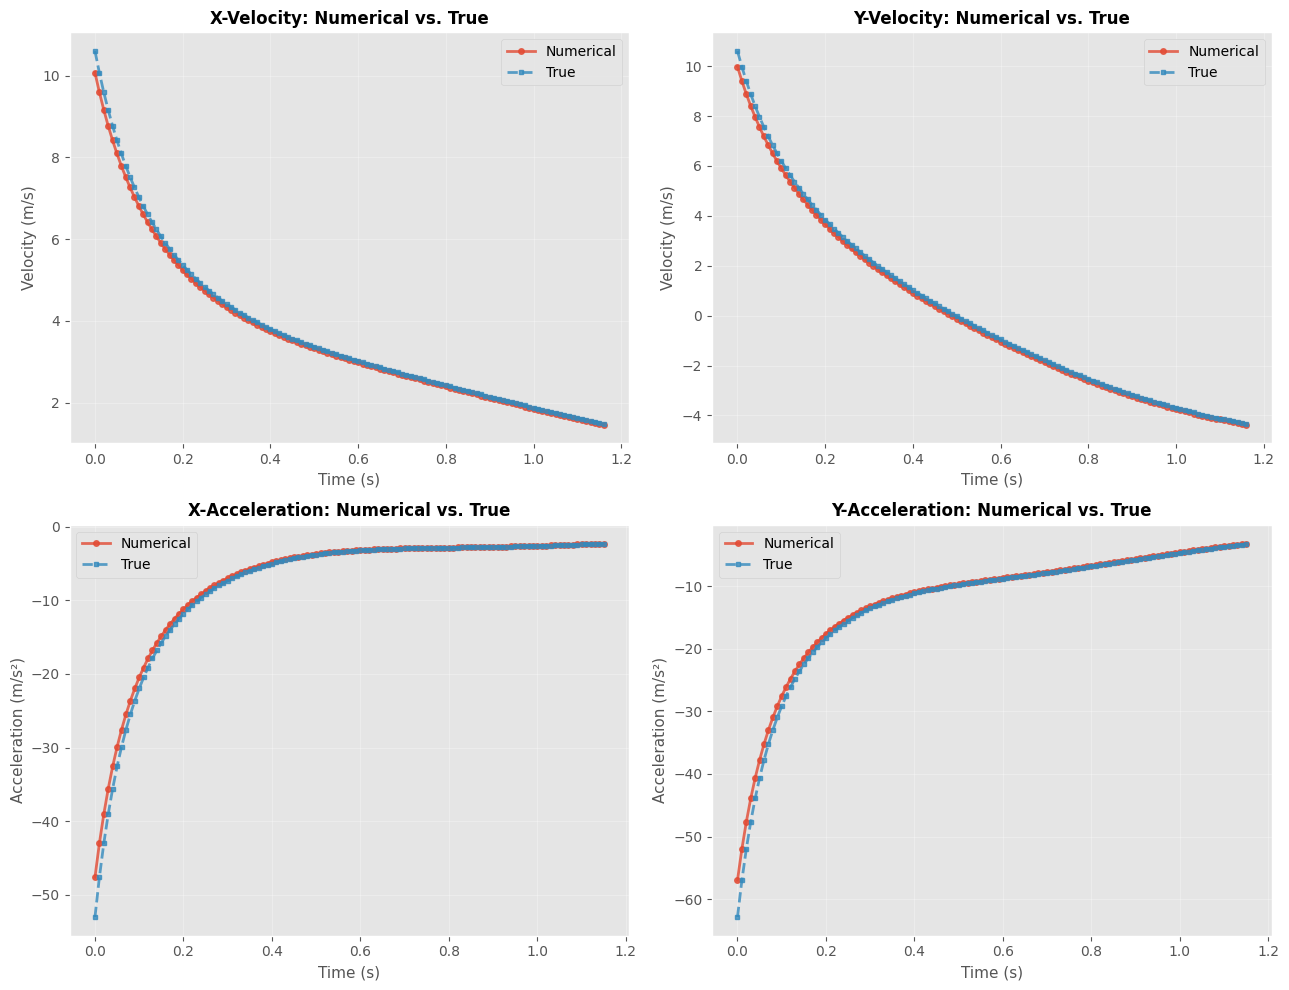

In [11]:
# === PLOT 2: Numerical vs. True Values ===
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

axes[0, 0].plot(t_vel, vx_numerical, 'o-', linewidth=2, markersize=4, label='Numerical', alpha=0.8)
axes[0, 0].plot(t_vel, vx_true[:-1], 's--', linewidth=2, markersize=3, label='True', alpha=0.8)
axes[0, 0].set_xlabel('Time (s)', fontsize=11)
axes[0, 0].set_ylabel('Velocity (m/s)', fontsize=11)
axes[0, 0].set_title('X-Velocity: Numerical vs. True', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(fontsize=10)

axes[0, 1].plot(t_vel, vy_numerical, 'o-', linewidth=2, markersize=4, label='Numerical', alpha=0.8)
axes[0, 1].plot(t_vel, vy_true[:-1], 's--', linewidth=2, markersize=3, label='True', alpha=0.8)
axes[0, 1].set_xlabel('Time (s)', fontsize=11)
axes[0, 1].set_ylabel('Velocity (m/s)', fontsize=11)
axes[0, 1].set_title('Y-Velocity: Numerical vs. True', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(fontsize=10)

# Compute true accelerations for comparison
ax_true = np.diff(vx_true) / dt
ay_true = np.diff(vy_true) / dt

axes[1, 0].plot(t_acc, ax_numerical, 'o-', linewidth=2, markersize=4, label='Numerical', alpha=0.8)
axes[1, 0].plot(t_acc, ax_true[:-1], 's--', linewidth=2, markersize=3, label='True', alpha=0.8)
axes[1, 0].set_xlabel('Time (s)', fontsize=11)
axes[1, 0].set_ylabel('Acceleration (m/s²)', fontsize=11)
axes[1, 0].set_title('X-Acceleration: Numerical vs. True', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(fontsize=10)

axes[1, 1].plot(t_acc, ay_numerical, 'o-', linewidth=2, markersize=4, label='Numerical', alpha=0.8)
axes[1, 1].plot(t_acc, ay_true[:-1], 's--', linewidth=2, markersize=3, label='True', alpha=0.8)
axes[1, 1].set_xlabel('Time (s)', fontsize=11)
axes[1, 1].set_ylabel('Acceleration (m/s²)', fontsize=11)
axes[1, 1].set_title('Y-Acceleration: Numerical vs. True', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend(fontsize=10)

plt.tight_layout()
plt.show()

## Exporting Your Notebook to PDF

When you submit homework on Gradescope, you'll need to convert this notebook to a PDF file. Here are your options:

### Option A: Using VS Code Extensions (Easiest)

1. Install the **"Jupyter PDF Export"** extension in VS Code:
   - Open the Extensions panel (Ctrl+Shift+X / Cmd+Shift+X)
   - Search for "Jupyter PDF"
   - Click **Install** on one of the popular ones (e.g., "Jupyter PDF Export" by Florian Wilhelm)

2. Once installed:
   - Right-click on your notebook file in the Explorer
   - Select **"Export as PDF"** (or similar option)
   - Choose where to save the file

### Option B: Command Line (Using nbconvert)

If you have Jupyter/nbconvert installed:

```bash
jupyter nbconvert --to pdf your_notebook.ipynb
```

### Option C: Web Browser

1. Open the notebook in Jupyter Lab or Jupyter Notebook (in a web browser)
2. Go to **File → Download as → PDF via LaTeX (.pdf)**

### Option D: Print to PDF (Most Reliable Fallback)

1. Open the notebook in VS Code
2. Use Ctrl+P (or Cmd+P) to open the **Command Palette**
3. Type **"Print"** and select **"Print Current File"** (or **"Export as HTML"** first, then print to PDF from your browser)

---

### Submitting to Gradescope

Follow the instructions in [Submitting Assignments on Gradescope](../admin/gradescope-submissions.md) for combining your handwritten work and notebook PDF into a single file.

**You do not need to submit this activity; it is for class practice only.**